### CLASSIFYING THE PRICE OF MOBILE PHONES BY APPLYING ML MODELS WITH A MULTINOMIAL APPROACH USING PYTHON LANGUAGE

#### Classify the mobile pricing in comparison with mobile set features. Additionally, identify which mobile features affecting the price most for a better mobile selling point.

#### Data source: https://www.kaggle.com/iabhishekofficial/mobile-price-classification



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
dataset = pd.read_csv("Mobile.csv")

In [3]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#Overview of Dataset Characteristics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

- Here we can see that all the data values are in numerical formate. 

In [5]:
#Summary of N/A Value
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- we have zero null values in the dataset.

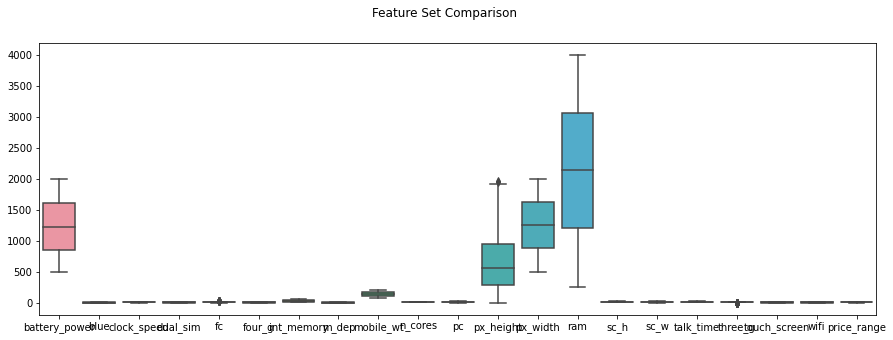

In [6]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset)
plt.show()

- Dataset dose not contain any outliers.

In [7]:
dataset['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

- Here the data have all the values in numerical formate. 
- There are no null values available. 
- There are no outliers presented in the data. 
- In the dataset, the dependent value "price_range" is divided into four categories.
- All the categories have the same value counts.

In [8]:
#Using Mapping
dataset['price_range'] = dataset['price_range'].map( {0:0, 1:0, 2:1, 3:1})

- converting muilty value into binomial values.

In [9]:
dataset['price_range'].value_counts()

1    1000
0    1000
Name: price_range, dtype: int64

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import sweetviz as sv
dataset_report = sv.analyze(dataset)
dataset_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


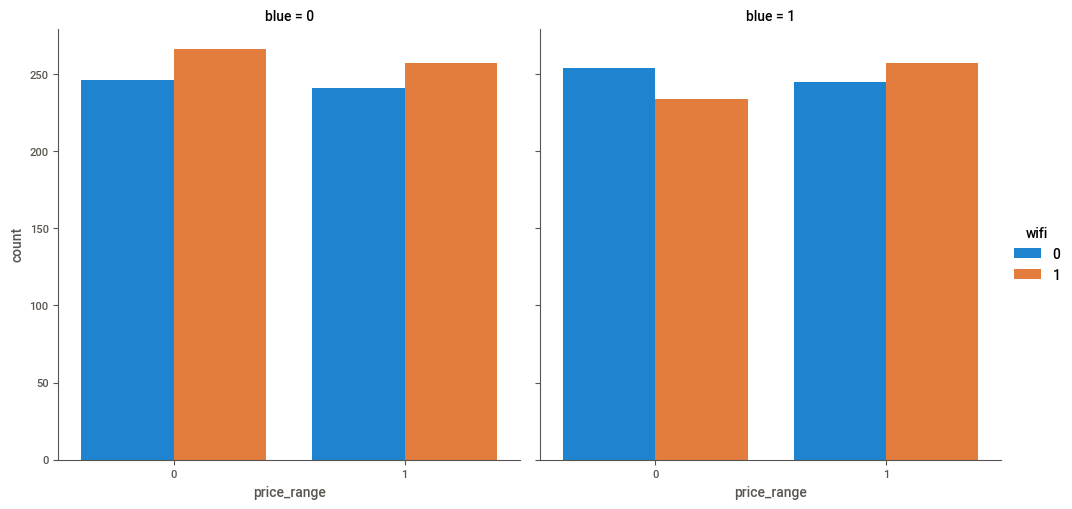

In [12]:
sns.catplot('price_range', col='blue',hue = 'wifi',data = dataset,  kind = 'count', col_wrap=2)

- bluetooth and wifi dose not have any effect on the mobile price. 

<AxesSubplot:xlabel='price_range', ylabel='count'>

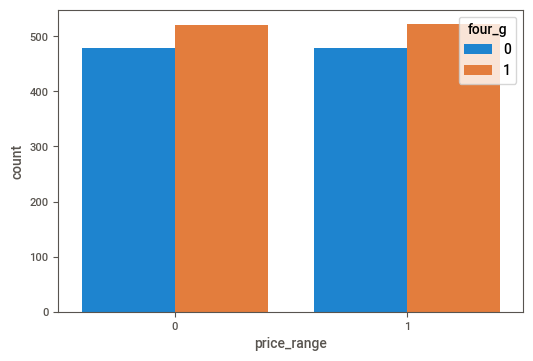

In [13]:
sns.countplot(dataset['price_range'],hue=dataset['four_g'])

- both the categories have 4G. 
- That means 4G dose not have significant effect on the price. 

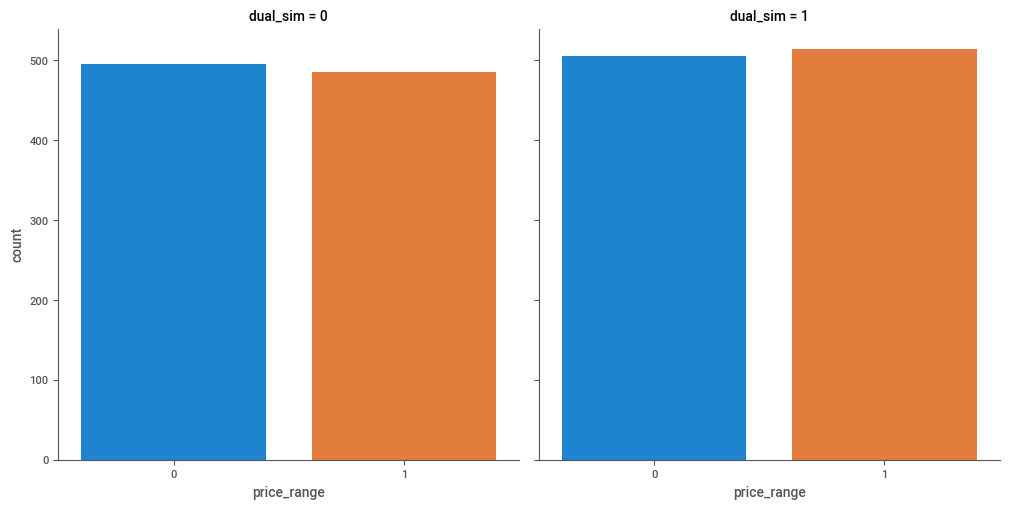

In [14]:
sns.catplot('price_range', col='dual_sim',data = dataset,  kind = 'count')

- dual sim have a very low effect on the price. 

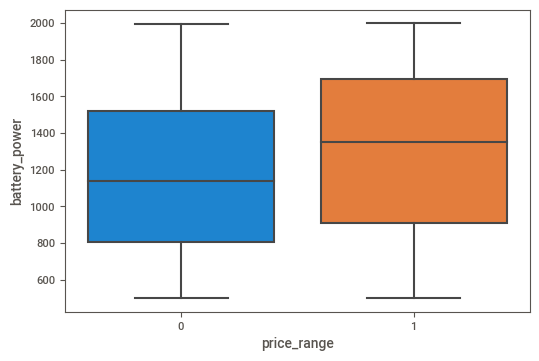

In [15]:
sns.boxplot(dataset['price_range'],dataset['battery_power']);
plt.show()

- We can see that mobile's battery effects the price of the mobile.

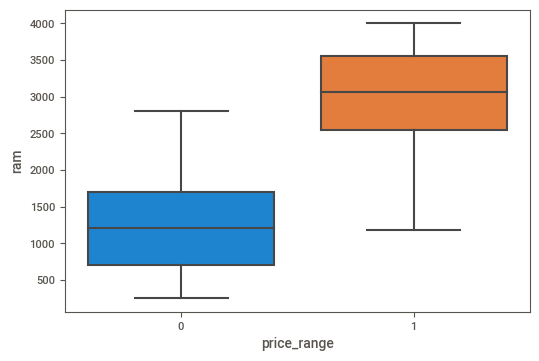

In [16]:
sns.boxplot(dataset['price_range'],dataset['ram']);
plt.show()

- Ram have a very huge effect on the price. 
- Higher ram increases the price of the phone. 

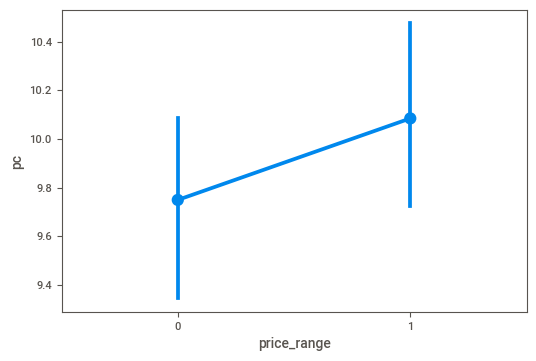

In [17]:
sns.pointplot(dataset['price_range'],dataset['pc']);

- Pc have a effect on the mobile's price. 

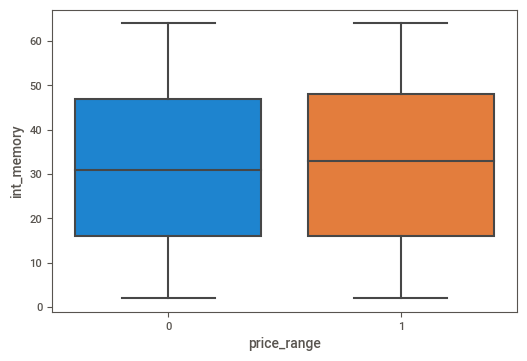

In [18]:
sns.boxplot(dataset['price_range'],dataset['int_memory']);

- internal memory dose not have much effect on the price.

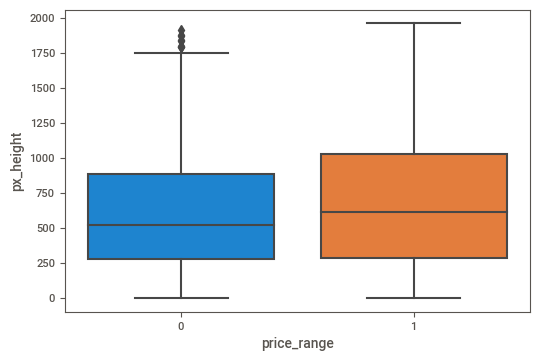

In [19]:
sns.boxplot(dataset['price_range'],dataset['px_height']);

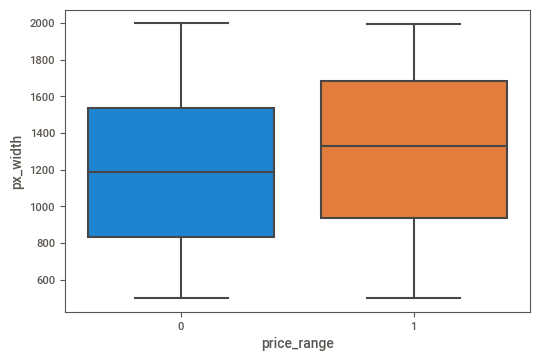

In [20]:
sns.boxplot(dataset['price_range'],dataset['px_width']);

- Px width and Px height have same effect on the price range. 

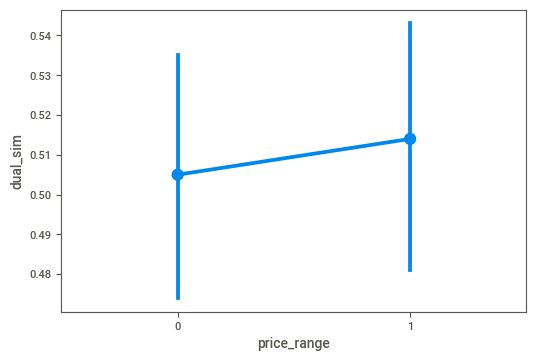

In [21]:
sns.pointplot(dataset['price_range'],dataset['dual_sim']);

- dual sim has a good impact on the price range 

<AxesSubplot:xlabel='fc'>

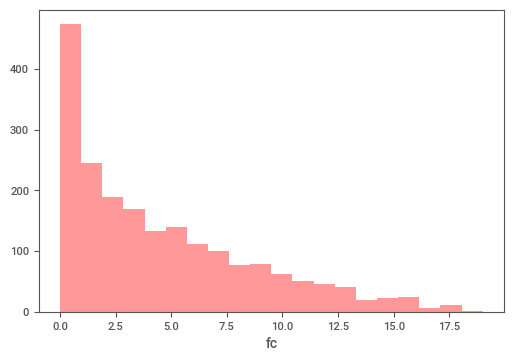

In [22]:
sns.distplot(dataset['fc'], color='red', kde=False)

- most of the fc values are from 0.0 to 5.0. 

<AxesSubplot:xlabel='sc_w'>

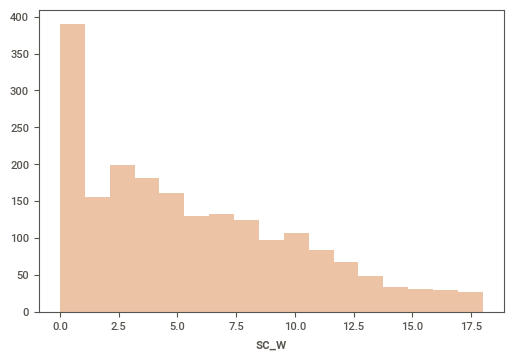

In [23]:
sns.distplot(dataset['sc_w'],color='chocolate', kde=False)

- Most of the phones gave sc_w values from 0.0 to 7.5. 

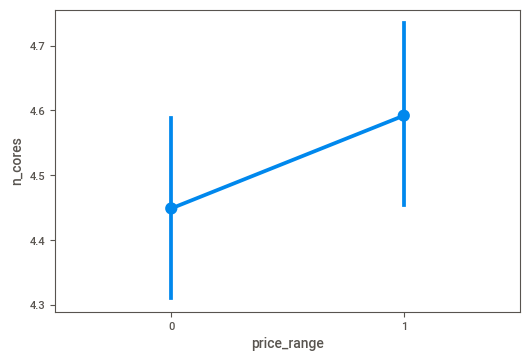

In [24]:
sns.pointplot(dataset['price_range'],dataset['n_cores']);

- n cores has the impact on the phone price. 

<AxesSubplot:xlabel='talk_time'>

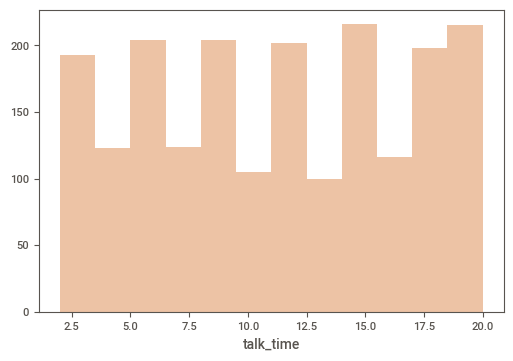

In [25]:
sns.distplot(dataset['talk_time'],color='chocolate', kde=False)

- there is no particular pattern in the talk time. 

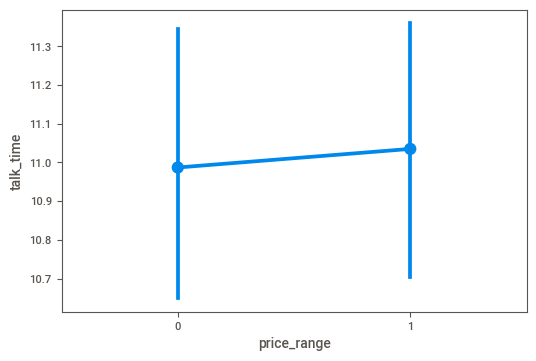

In [26]:
sns.pointplot(dataset['price_range'],dataset['talk_time']);

- talk time have very minor effect on the price range. 

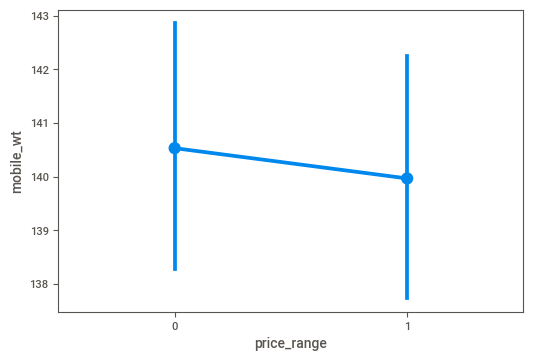

In [27]:
sns.pointplot(dataset['price_range'],dataset['mobile_wt']);

- we can see that when the phone phone width increases, the phone price decreses. 

<AxesSubplot:xlabel='clock_speed'>

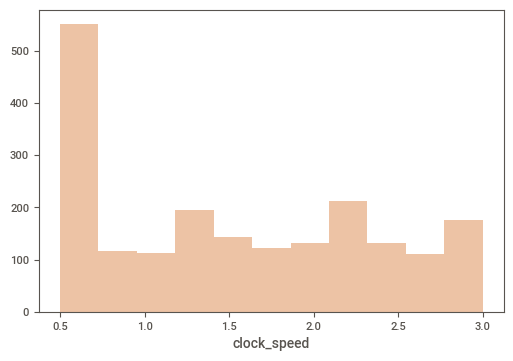

In [28]:
sns.distplot(dataset['clock_speed'],color='chocolate', kde=False)

- Most of the phone have clock speed around 0.5. 

<AxesSubplot:>

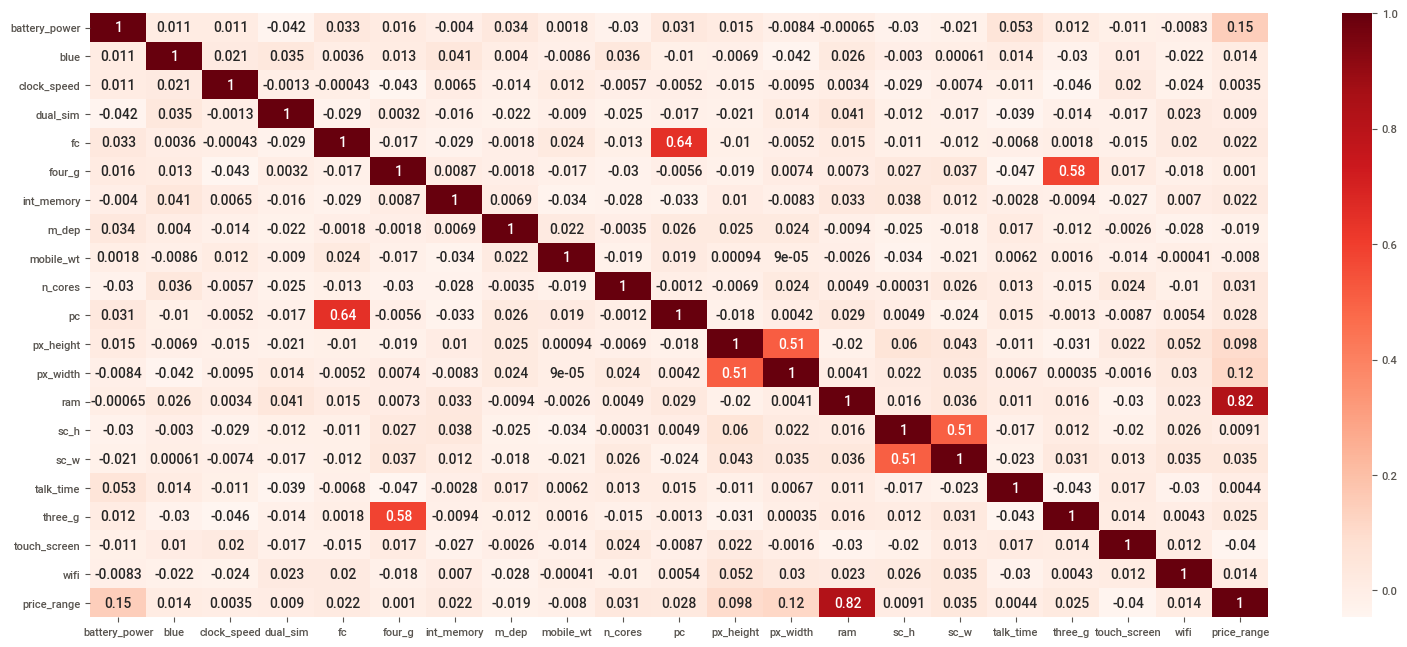

In [29]:
#Visualization of Correlations
fig = plt.figure(figsize=(19,8))
sns.heatmap(dataset.corr(),annot=True,cmap="Reds")

- heat map shows the relationship between independent variables. 
- here we can see that px_width & px_height and sc_w & sc_h are very highly related. 

In [30]:
#### Independent And Dependent features
X=dataset.drop('price_range',axis=1)
y=dataset['price_range']

In [31]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[178   9]
 [ 18 195]]
0.9325
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       187
           1       0.96      0.92      0.94       213

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



- Here we can see that the accuracy of the model is ~0.93. 
- TN = 175, TP = 196, FP = 12, FN = 17


In [34]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[175  12]
 [ 17 196]]
0.9275
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       187
           1       0.94      0.92      0.93       213

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



- Here we Manually added some Hyperparameters for better tuning. 
- But there is not much effect on the matrix. 


### Random search CV

In [35]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace
                (start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [36]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [37]:
rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 560,
 'criterion': 'entropy'}

In [38]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [39]:
best_random_grid=rf_randomcv.best_estimator_

In [40]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[176  11]
 [ 14 199]]
Accuracy Score 0.9375
Classification report:               precision    recall  f1-score   support

           0       0.93      0.94      0.93       187
           1       0.95      0.93      0.94       213

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



### GridSearch CV

In [41]:
rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 560,
 'criterion': 'entropy'}

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, 
                     rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, 
                     rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [560], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1600, 1700, 1800, 1900, 2000]}


In [43]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=30,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 30 folds for each of 75 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 18.6min finished


GridSearchCV(cv=30, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [560],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1600, 1700, 1800, 1900, 2000]},
             verbose=2)

In [45]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=560, max_features='log2',
                       n_estimators=2000)

In [46]:
best_grid=grid_search.best_estimator_

In [47]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=560, max_features='log2',
                       n_estimators=2000)

In [48]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[176  11]
 [ 14 199]]
Accuracy Score 0.9375
Classification report:               precision    recall  f1-score   support

           0       0.93      0.94      0.93       187
           1       0.95      0.93      0.94       213

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

